# Linear Algebra (CpE210A)

# Laboratory 2: Plotting Vectors using NumPy and MatPlotLib

Coded and submitted by:

Canoza, Cherrylyn S.

58010

Lab Exercises

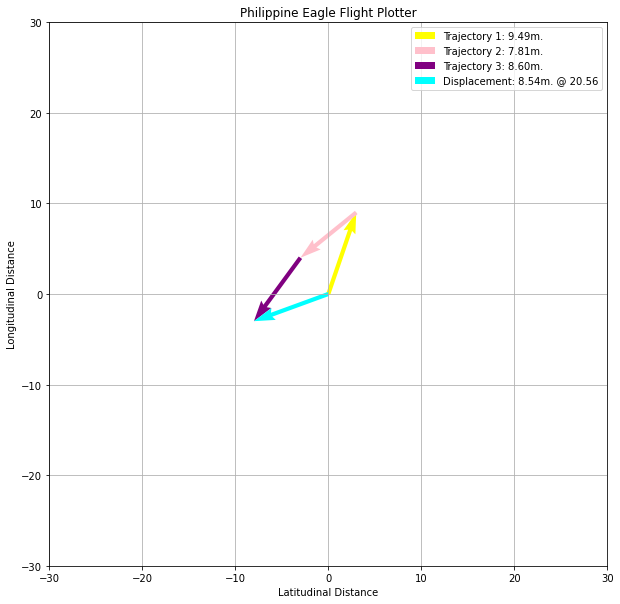

In [29]:
#Part 1: Skyline Eagle Fly

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

def track_eagle(make_figs=True):
    long = np.random.randint(-10,10, size=3)  
    lat =  np.random.randint(-10,10, size=3)  
                                               
                                              
  
    dist1 = np.array([long[0],lat[0]])                        
    dist2 = np.array([long[1],lat[1]])
    dist3 = np.array([long[2],lat[2]])  
    
    dist_total = dist1 + dist2 + dist3                            
    disp  = np.linalg.norm(dist_total)                               
    alpha = 10**-6
    theta = np.arctan((dist_total[1])/(dist_total[0] + alpha))     
    theta = np.degrees(theta)                                     
   

    plt.figure(figsize=(10,10)) 
    plt.title('Philippine Eagle Flight Plotter')
    plt.xlim(-30, 30)
    plt.ylim(-30, 30)
    plt.xlabel('Latitudinal Distance')
    plt.ylabel('Longitudinal Distance')
    plt.grid()
    n = 2


 
    
    #(trajectory 1)
    plt.quiver(0,0, dist1[0], dist1[1], 
               angles='xy', scale_units='xy',scale=1, color='yellow', 
               label='Trajectory 1: {:.2f}m.'.format(np.linalg.norm(dist1)))
    # (trajectory 2)
    plt.quiver(dist1[0], dist1[1], dist2[0], dist2[1], 
               angles='xy', scale_units='xy',scale=1, color='pink',
              label='Trajectory 2: {:.2f}m.'.format(np.linalg.norm(dist2)))
    # (trajectory 3)
    plt.quiver(np.add(dist1[0],dist2[0]), np.add(dist1[1],dist2[1]),
               dist3[0], dist3[1], angles='xy', scale_units='xy',scale=1, color='purple',
              label='Trajectory 3: {:.2f}m.'.format(np.linalg.norm(dist3)))
    #(total displacement)
    plt.quiver(0,0, dist_total[0], dist_total[1], 
               angles='xy', scale_units='xy',scale=1, color='cyan',
              label='Displacement: {:.2f}m. @ {:.2f}'.format(disp, theta))
    
    plt.legend()    

    
    if make_figs:
        plt.savefig(f'LinAlg-Lab2-PH Eagle-{int(disp)}@{int(theta)}.png', dpi=300)
    
track_eagle(make_figs=False)


plt.show()

In [30]:
#Part 2: Reverse Engineering

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

def eagle_kinematics(eagle_pos, time): # Function to compute for the  total position(total_pos), total velocity(total_vel) and total acceleration(total_accel) of the eagle
    req_shape = 4
    
    vel = np.zeros((req_shape-1,)) # declare initial array variable for velocity(vel) with size req_shape-1 = 3 with zeroes as initial value --> [0, 0, 0]
    accel = np.zeros((req_shape-2,)) # declare initial array variable for acceleration(accel) with size req_shape-2 = 2 with zeroes as initial value --> [0, 0]
    total_vect = np.array([time**3, time**2, time, 1]) # declare initial array for total vector(total_vect) with default size 4 and initial values time(t)^3, time(t)^2, time(t) and 1 --> [8, 4, 2, 1]

    if eagle_pos.shape == (req_shape,): # check if passed array parameter eagle_pos has a length of req_shape(4)
        
        vel = np.array([3*eagle_pos[0], 2*eagle_pos[1], eagle_pos[2]]) # compute for the velocity 3*2, 2*1, 3 --> [6, 2, 3]  
        accel = np.array([2*vel[0], vel[1]]) # compute for the acceleration 2*6, 2 --> [12, 2]
        
        total_pos = np.sum(np.multiply(eagle_pos, total_vect)) # multiply eagle_pos with total_vect: 2*8, 1*4, 3*2, 2*1 --> [16, 4, 6, 2]
                                                               # sum all values of the result: 16+4+6+2 = 28
        total_vel = np.sum(np.multiply(vel, total_vect[1:])) # multiply vel with total_vect(starting from index 1): 6*4, 2*2, 3*1 --> [24, 4, 3]
                                                             # sum all values of the result: 24+4+3 = 31
        total_accel = np.sum(np.multiply(accel, total_vect[2:])) # multiple accel with total_vect(starting from index 2): 12*2, 2*1 --> [24, 2]
                                                                 # sum all values of the result: 24+2 = 26
    else:
        print(f'Input displacement vector is not valid. Make sure that the vector shape is ({req_shape},)') # Prints an error if the length of eagle_pos is not equal to req_shape(4)
    
    return total_pos, total_vel, total_accel # Return values for total_pos, total_vel and total_accel


eagle_position = np.array([2,1,3,2]) # Eagle position
time = 2 # Time it took for the flight

eagle_kinematics(eagle_position, time) # Call function eagle_kinematics

(28, 31, 26)

# EAGLE KINEMATICS



def eagle_kinematics(eagle_pos, time): 
    - Function to compute for the  total position(total_pos), total velocity(total_vel) and total acceleration(total_accel) of the eagle
    req_shape = 4
    
    vel = np.zeros((req_shape-1,))
        declare initial array variable for velocity(vel) with size req_shape-1 = 3 with zeroes as initial value --> [0, 0, 0]
        
    accel = np.zeros((req_shape-2,))
        - declare initial array variable for acceleration(accel) with size req_shape-2 = 2 with zeroes as initial value --> [0, 0]
    total_vect = np.array([time**3, time**2, time, 1]) 
        - declare initial array for total vector(total_vect) with default size 4 and initial values time(t)^3, time(t)^2, time(t) and 1 --> [8, 4, 2, 1]

    if eagle_pos.shape == (req_shape,): 
        - check if passed array parameter eagle_pos has a length of req_shape(4)
        
        vel = np.array([3*eagle_pos[0], 2*eagle_pos[1], eagle_pos[2]]) 
            - compute for the velocity 3*2, 2*1, 3 --> [6, 2, 3]
            
        accel = np.array([2*vel[0], vel[1]]) 
            - compute for the acceleration 2*6, 2 --> [12, 2]
        
        total_pos = np.sum(np.multiply(eagle_pos, total_vect)) 
            - multiply eagle_pos with total_vect: 2*8, 1*4, 3*2, 2*1 --> [16, 4, 6, 2]
            - sum all values of the result: 16+4+6+2 = 28
                total position = summation of (position x total vector)
                
        total_vel = np.sum(np.multiply(vel, total_vect[1:])) 
            - multiply vel with total_vect(starting from index 1): 6*4, 2*2, 3*1 --> [24, 4, 3]
            - sum all values of the result: 24+4+3 = 31
                total velocity = summation of (velocity x total vector)
                
        total_accel = np.sum(np.multiply(accel, total_vect[2:]))
            - multiple accel with total_vect(starting from index 2): 12*2, 2*1 --> [24, 2]
            - sum all values of the result: 24+2 = 26
                total acceleration = summation of (acceleration x total vector)
    else:
        print(f'Input displacement vector is not valid. Make sure that the vector shape is ({req_shape},)')
            - Prints an error if the length of eagle_pos is not equal to req_shape(4)
    
    return total_pos, total_vel, total_accel 
        - Return values for total_pos, total_vel and total_accel


eagle_position = np.array([2,1,3,2])
    - Eagle position
    
time = 2
    - Time it took for the flight

eagle_kinematics(eagle_position, time)
    - Call function eagle_kinematics

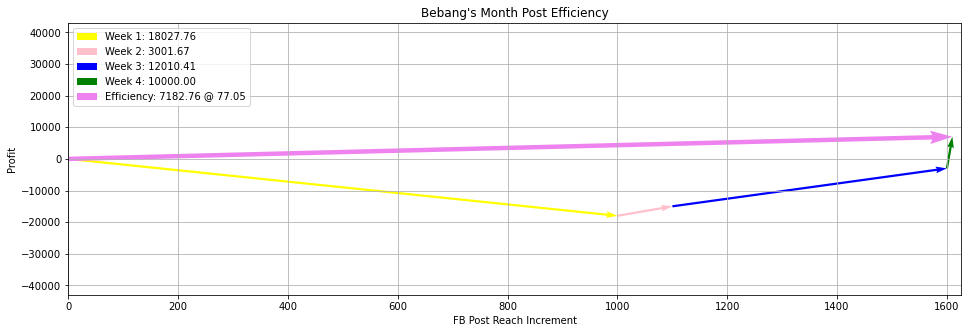

In [31]:
#Part 3: Bebang's Online Business

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
def month_profit_trace(profit, reach, make_figs=False):
        if (profit.shape == (4,)) and (reach.shape == (4,)):
            week1 = np.array((reach[0], profit[0])) # profit and reach index 0 represents week1    
            week2 = np.array((reach[1], profit[1])) # profit and reach index 1 represents week2
            week3 = np.array((reach[2], profit[2])) # profit and reach index 2 represents week3
            week4 = np.array((reach[3], profit[3])) # profit and reach index 3 represents week4
            
            week_total = week1 + week2 + week3 + week4 
            week_performance = np.linalg.norm(week_total)
            alpha = 10**-6
            reach_gradient = np.arctan((week_total[1])/(week_total[0] + alpha))    # computes for the angle of the displacement
            reach_gradient = np.degrees(reach_gradient)                            # converts theta from rad to deg


            plt.figure(figsize=(16,5))
            plt.title('Bebang\'s Month Post Efficiency')
            plt.xlim(0,1.01*np.sum(reach))
            plt.ylim(-np.sum(np.abs(profit)),np.sum(np.abs(profit)))
            plt.xlabel('FB Post Reach Increment')
            plt.ylabel('Profit')
            plt.grid()
            
            # Week1 plot
            plt.quiver(0,0, week1[0], week1[1], 
                       angles='xy', scale_units='xy',scale=1, color='yellow', width=0.0025,
                       label='Week 1: {:.2f}'.format(np.linalg.norm(week1)))
            # Week2 plot
            plt.quiver(week1[0], week1[1], week2[0], week2[1], 
                       angles='xy', scale_units='xy',scale=1, color='pink', width=0.0025, 
                       label='Week 2: {:.2f}'.format(np.linalg.norm(week2)))
            # Week3 plot
            plt.quiver((week1[0] + week2[0]), (week1[1] + week2[1]), week3[0], week3[1], 
                       angles='xy', scale_units='xy',scale=1, color='blue', width=0.0025, 
                       label='Week 3: {:.2f}'.format(np.linalg.norm(week3)))
            # Week4 plot
            plt.quiver((week1[0] + week2[0] + week3[0]), (week1[1] + week2[1] + week3[1]), week4[0], week4[1], 
                       angles='xy', scale_units='xy',scale=1, color='green', width=0.0025, 
                       label='Week 4: {:.2f}'.format(np.linalg.norm(week4)))

            # Efficiency plot
            plt.quiver(0,0, week_total[0], week_total[1], 
                       angles='xy', scale_units='xy',scale=1, color='violet', width=0.005, 
                       label='Efficiency: {:.2f} @ {:.2f}'.format(week_performance, reach_gradient))
            plt.legend(loc='upper left')
            
            if make_figs:
                plt.savefig(f'LinAlg-Lab2-Bebang Post Eff-{int(week_performance)}@{int(reach_gradient)}.png', dpi=300)
            plt.show()
            
        else:
            print('Run at End of Month to generate report. Requires 4 weeks of input for both profit and reach.')
            
profit= np.array([-18000, 3000, 12000, 10000])    ## You can change the values to make different scenarios
reach = np.array([1000, 100, 500, 10])             ## You can change the values to make different scenarios

month_profit_trace(profit, reach, make_figs=False) ## Toggle 'make_figs' during debugging or making documentations